## Voting Classifier (Hybrid of RF, SVM, and XGBoost) ##

🔥 Voting Classifier Accuracy: 65.24%

🔹 Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.82      0.74       157
           2       0.76      0.66      0.71       166
           3       0.66      0.66      0.66       160
           4       0.68      0.61      0.64       148
           5       0.59      0.57      0.58       156
           6       0.65      0.72      0.68       167
           7       0.67      0.59      0.63       165
           8       0.58      0.59      0.58       154
           9       0.66      0.69      0.68       150
          10       0.57      0.60      0.58       156
          11       0.64      0.59      0.61       154
          12       0.70      0.73      0.72       163

    accuracy                           0.65      1896
   macro avg       0.65      0.65      0.65      1896
weighted avg       0.65      0.65      0.65      1896



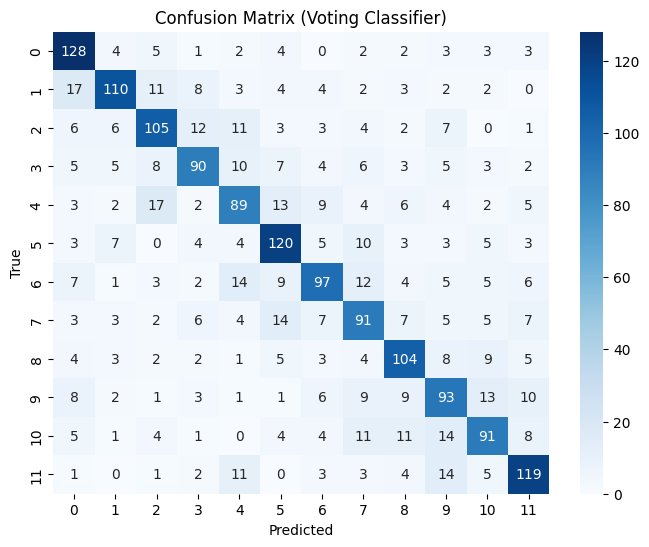

In [2]:
# ✅ Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# ✅ Load dataset
file_path = "scaled_hand_angles.csv"
data = pd.read_csv(file_path)

# ✅ Separate features and labels
X = data.drop(columns=['target'])
y = data['target']

# ✅ Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ Handle Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# ✅ Split dataset after SMOTE
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# ✅ Define Base Models
rf = RandomForestClassifier(n_estimators=300, max_depth=15, random_state=42)
svm = SVC(probability=True, C=2, kernel='rbf', random_state=42)
xgb = XGBClassifier(n_estimators=500, max_depth=10, learning_rate=0.05, eval_metric='mlogloss', random_state=42)

# ✅ Create Voting Classifier (Soft Voting)
voting_clf = VotingClassifier(
    estimators=[('rf', rf), ('svm', svm), ('xgb', xgb)], 
    voting='soft'
)

# ✅ Train & Predict
voting_clf.fit(X_train, y_train)
voting_predictions = voting_clf.predict(X_test)

# ✅ Evaluate
accuracy = accuracy_score(y_test, voting_predictions)
print(f"🔥 Voting Classifier Accuracy: {accuracy * 100:.2f}%")
print("\n🔹 Classification Report:")
print(classification_report(y_test, voting_predictions))

# ✅ Confusion Matrix
conf_matrix = confusion_matrix(y_test, voting_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Voting Classifier)')
plt.show()


## Hybrid Model (Bagging + Boosting) ##

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000970 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 7584, number of used features: 16
[LightGBM] [Info] Start training from score -2.483326
[LightGBM] [Info] Start training from score -2.497646
[LightGBM] [Info] Start training from score -2.488076
[LightGBM] [Info] Start training from score -2.469208
[LightGBM] [Info] Start training from score -2.481747
[LightGBM] [Info] Start training from score -2.499250
[LightGBM] [Info] Start training from score -2.496044
[LightGBM] [Info] Start training from score -2.478597
[LightGBM] [Info] Start training from score -2.472328
[LightGBM] [Info] Start training from score -2.481747
[LightGBM] [Info] Start training from score -2.478597
[LightGBM] [Info] Start training from score -2.492850
[LightGBM] [Warning] No further splits with positive gain, best 

e:\DSGP - 2\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


🔥 Hybrid Bagging + Boosting Accuracy: 66.19%

🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.82      0.76       157
           1       0.71      0.70      0.71       166
           2       0.63      0.68      0.65       160
           3       0.67      0.63      0.65       148
           4       0.58      0.61      0.59       156
           5       0.65      0.70      0.67       167
           6       0.71      0.56      0.63       165
           7       0.60      0.60      0.60       154
           8       0.68      0.74      0.71       150
           9       0.60      0.60      0.60       156
          10       0.69      0.63      0.66       154
          11       0.74      0.67      0.70       163

    accuracy                           0.66      1896
   macro avg       0.66      0.66      0.66      1896
weighted avg       0.66      0.66      0.66      1896



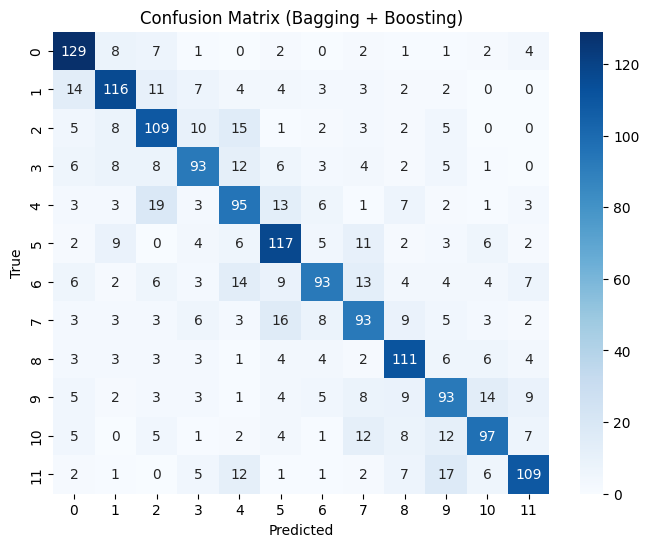

In [5]:
# ✅ Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline

# ✅ Load dataset
file_path = "scaled_hand_angles.csv"
data = pd.read_csv(file_path)

# ✅ Separate features and labels
X = data.drop(columns=['target'])
y = data['target']

# 🔥 FIX: Shift labels to start from 0 instead of 1
y = y - 1  

# ✅ Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ Handle Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# ✅ Split dataset after SMOTE
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# ✅ Define Models
rf = RandomForestClassifier(n_estimators=300, max_depth=15, random_state=42)
xgb = XGBClassifier(n_estimators=500, max_depth=10, learning_rate=0.05, eval_metric='mlogloss', random_state=42)
lgbm = LGBMClassifier(n_estimators=400, learning_rate=0.03, max_depth=12, random_state=42)

# ✅ Bagging (Using Random Forest as Base Estimator)
bagging_model = BaggingClassifier(estimator=rf, n_estimators=10, random_state=42)

# ✅ Train All Models
bagging_model.fit(X_train, y_train)
xgb.fit(X_train, y_train)  # Fixed - No class mismatch now
lgbm.fit(X_train, y_train)

# ✅ Predict
bagging_preds = bagging_model.predict(X_test)
xgb_preds = xgb.predict(X_test)
lgbm_preds = lgbm.predict(X_test)

# ✅ Ensemble (Majority Voting)
final_predictions = np.array([bagging_preds, xgb_preds, lgbm_preds])
ensemble_preds = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=final_predictions)

# ✅ Evaluate
accuracy = accuracy_score(y_test, ensemble_preds)
print(f"🔥 Hybrid Bagging + Boosting Accuracy: {accuracy * 100:.2f}%")
print("\n🔹 Classification Report:")
print(classification_report(y_test, ensemble_preds))

# ✅ Confusion Matrix
conf_matrix = confusion_matrix(y_test, ensemble_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Bagging + Boosting)')
plt.show()


## Stacking Classifier ( Random Forest, XGB and lgbm)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000590 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 7012, number of used features: 16
[LightGBM] [Info] Start training from score -2.502749
[LightGBM] [Info] Start training from score -2.450150
[LightGBM] [Info] Start training from score -2.506239
[LightGBM] [Info] Start training from score -2.476952
[LightGBM] [Info] Start training from score -2.509742
[LightGBM] [Info] Start training from score -2.522099
[LightGBM] [Info] Start training from score -2.515019
[LightGBM] [Info] Start training from score -2.499271
[LightGBM] [Info] Start training from score -2.437013
[LightGBM] [Info] Start training from score -2.406489
[LightGBM] [Info] Start training from score -2.435383
[LightGBM] [Info] Start training from score -2.569380
[LightGBM] [Warning] No further splits with positive gain, best 

e:\DSGP - 2\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000431 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 5609, number of used features: 16
[LightGBM] [Info] Start training from score -2.503078
[LightGBM] [Info] Start training from score -2.450043
[LightGBM] [Info] Start training from score -2.507444
[LightGBM] [Info] Start training from score -2.477270
[LightGBM] [Info] Start training from score -2.509635
[LightGBM] [Info] Start training from score -2.522880
[LightGBM] [Info] Start training from score -2.514031
[LightGBM] [Info] Start training from score -2.498730
[LightGBM] [Info] Start training from score -2.437722
[LightGBM] [Info] Start training from score -2.405591
[LightGBM] [Info] Start training from score -2.435684
[LightGBM] [Info] Start training from score -2.568343
[LightGBM] [Warning] No further splits with positive gain, best 

e:\DSGP - 2\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000321 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 5610, number of used features: 16
[LightGBM] [Info] Start training from score -2.503256
[LightGBM] [Info] Start training from score -2.450221
[LightGBM] [Info] Start training from score -2.505437
[LightGBM] [Info] Start training from score -2.477448
[LightGBM] [Info] Start training from score -2.509813
[LightGBM] [Info] Start training from score -2.520839
[LightGBM] [Info] Start training from score -2.514209
[LightGBM] [Info] Start training from score -2.501080
[LightGBM] [Info] Start training from score -2.437901
[LightGBM] [Info] Start training from score -2.405769
[LightGBM] [Info] Start training from score -2.433827
[LightGBM] [Info] Start training from score -2.570849
[LightGBM] [Warning] No further splits with positive gain, best 

e:\DSGP - 2\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000626 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 5610, number of used features: 16
[LightGBM] [Info] Start training from score -2.503256
[LightGBM] [Info] Start training from score -2.450221
[LightGBM] [Info] Start training from score -2.505437
[LightGBM] [Info] Start training from score -2.475327
[LightGBM] [Info] Start training from score -2.509813
[LightGBM] [Info] Start training from score -2.520839
[LightGBM] [Info] Start training from score -2.514209
[LightGBM] [Info] Start training from score -2.498908
[LightGBM] [Info] Start training from score -2.437901
[LightGBM] [Info] Start training from score -2.407748
[LightGBM] [Info] Start training from score -2.435862
[LightGBM] [Info] Start training from score -2.570849
[LightGBM] [Warning] No further splits with positive gain, best 

e:\DSGP - 2\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000543 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 5610, number of used features: 16
[LightGBM] [Info] Start training from score -2.501080
[LightGBM] [Info] Start training from score -2.450221
[LightGBM] [Info] Start training from score -2.505437
[LightGBM] [Info] Start training from score -2.477448
[LightGBM] [Info] Start training from score -2.509813
[LightGBM] [Info] Start training from score -2.523058
[LightGBM] [Info] Start training from score -2.516414
[LightGBM] [Info] Start training from score -2.498908
[LightGBM] [Info] Start training from score -2.435862
[LightGBM] [Info] Start training from score -2.407748
[LightGBM] [Info] Start training from score -2.435862
[LightGBM] [Info] Start training from score -2.568521
[LightGBM] [Warning] No further splits with positive gain, best 

e:\DSGP - 2\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\DSGP - 2\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


🔥 Stacking Model Accuracy: 64.31%

🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.73      0.74       143
           1       0.70      0.70      0.70       152
           2       0.55      0.64      0.59       143
           3       0.59      0.63      0.61       147
           4       0.59      0.49      0.54       142
           5       0.70      0.67      0.68       141
           6       0.56      0.59      0.58       142
           7       0.59      0.65      0.62       144
           8       0.68      0.68      0.68       154
           9       0.66      0.62      0.64       158
          10       0.62      0.64      0.63       154
          11       0.78      0.66      0.72       134

    accuracy                           0.64      1754
   macro avg       0.65      0.64      0.64      1754
weighted avg       0.65      0.64      0.64      1754



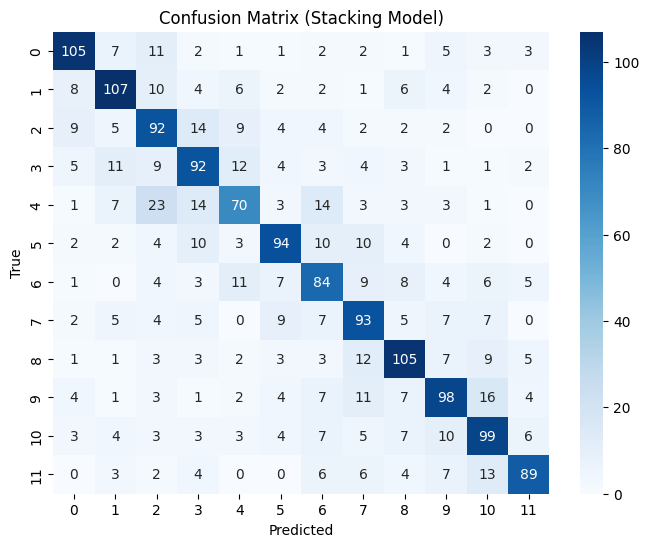

In [7]:
# ✅ Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# ✅ Load Dataset (Replace with your actual dataset)
df = pd.read_csv("scaled_hand_angles.csv")  # 🔸 Replace with actual dataset path

# ✅ Preprocess Data
X = df.drop(columns=['target'])  # 🔸 Replace 'target' with actual target column name
y = df['target']

# ✅ Handle Class Labels (Ensure class labels start from 0)
y -= y.min()  # Normalizing to start from 0 if needed

# ✅ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ✅ Standardize Features (Optional for tree-based models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ✅ Define Base Models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=300, max_depth=15, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=500, max_depth=10, learning_rate=0.05, eval_metric='mlogloss', random_state=42)),
    ('lgbm', LGBMClassifier(n_estimators=400, learning_rate=0.03, max_depth=12, random_state=42))
]

# ✅ Define Meta Model (Final Estimator)
meta_model = LogisticRegression()

# ✅ Define Stacking Model
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# ✅ Train Stacking Model
stacking_model.fit(X_train, y_train)

# ✅ Predict
stacking_preds = stacking_model.predict(X_test)

# ✅ Evaluate Performance
stacking_accuracy = accuracy_score(y_test, stacking_preds)
print(f"🔥 Stacking Model Accuracy: {stacking_accuracy * 100:.2f}%")
print("\n🔹 Classification Report:")
print(classification_report(y_test, stacking_preds))

# ✅ Confusion Matrix
conf_matrix = confusion_matrix(y_test, stacking_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Stacking Model)')
plt.show()
